# 영화평점에 대한 평점 변화 (시각화) [실습]

In [30]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
import pandas as pd

In [5]:
base_url = 'https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20201005'

try:
    html = urlopen(base_url+sub_url)
except HTTPError as he : 
    print('http error')
except URLError as ue : 
    print('url error')
else :
    print('정상 작동 중~')

정상 작동 중~


In [6]:
soup = BeautifulSoup(html.read(), 'html.parser')

In [10]:
soup.find_all('div', 'tit5')[0:3]

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=69105" title="월-E">월-E</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=195975" title="브레이크 더 사일런스: 더 무비">브레이크 더 사일런스: 더 무비</a>
 </div>]

#### 영화명 가져오기

In [17]:
soup.find_all('div', 'tit5')[0].a.string

'월-E'

In [18]:
soup.find_all('div', 'tit5')[0].a.get_text()

'월-E'

In [28]:
name = []
for i in soup.find_all('div','tit5'):
    name.append(i.a.string)
len(name)

50

#### 평점 가져오기

In [20]:
soup.find_all('td', 'point')[0:3]

[<td class="point">9.41</td>,
 <td class="point">9.39</td>,
 <td class="point">9.35</td>]

In [26]:
soup.find_all('td','point')[0].string

'9.41'

In [27]:
soup.find_all('td','point')[0].get_text()

'9.41'

In [29]:
grade = []
for j in soup.find_all('td','point'):
    grade.append(j.string)
len(grade)

50

#### 데이터프레임 만들기

In [32]:
df = pd.DataFrame({'영화명':name, '평점':grade})

In [33]:
df.head()

,영화명,평점
0,월-E,9.41
1,소년시절의 너,9.39
2,브레이크 더 사일런스: 더 무비,9.35
3,"미안해요, 리키",9.32
4,언더독,9.30


In [41]:
date = pd.date_range('2017-5-1', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [43]:
import urllib
from tqdm import tqdm_notebook
import time

In [44]:
for n in tqdm_notebook(range(100)):
    time.sleep(0.1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [67]:
name_result = []
point_result = []
date_result = []

In [68]:
base_url = 'https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date='

for day in tqdm_notebook(date):
    html = base_url + sub_url + '{date}'
    response = urlopen(html.format(date=urllib.parse.quote(day.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td', 'point'))
    name_result.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0,end)])
    point_result.extend([soup.find_all('td', 'point')[n].string for n in range(0,end)])
    date_result.extend([day for n in range(0,end)])


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [69]:
print(len(name_result))
print(len(point_result))
print(len(date_result))

4723
4723
4723


In [64]:
response

In [70]:
movie_df = pd.DataFrame({'date':date_result, 'name':name_result, 'point':point_result})
movie_df.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25
...,...,...,...
4718,2017-08-08,송 투 송,6.88
4719,2017-08-08,그 후,6.58
4720,2017-08-08,박쥐,6.09
4721,2017-08-08,싸이보그지만 괜찮아,5.17


- astype 변수를 이용해서 컬럼의 타입을 변경할 수 있다

In [76]:
movie_df['point'] = movie_df['point'].astype(float)

In [77]:
movie_df.info

<bound method DataFrame.info of            date        name  point
0    2017-05-01      히든 피겨스   9.38
1    2017-05-01   사운드 오브 뮤직   9.36
2    2017-05-01      시네마 천국   9.29
3    2017-05-01      미스 슬로운   9.26
4    2017-05-01  잉여들의 히치하이킹   9.25
...         ...         ...    ...
4718 2017-08-08       송 투 송   6.88
4719 2017-08-08         그 후   6.58
4720 2017-08-08          박쥐   6.09
4721 2017-08-08  싸이보그지만 괜찮아   5.17
4722 2017-08-08         군함도   5.02

[4723 rows x 3 columns]>

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 내가 원하는 영화의 평점을 총점으로 확인하고 싶다면?  
->  pivot 테이블을 이용할 수 있다

In [87]:
movie_pivot = pd.pivot_table(movie_df, index= ['name'], aggfunc=np.sum)
movie_pivot.head()

,point
name,
10분,124.46
47 미터,149.23
500일의 썸머,75.51
7년-그들이 없는 언론,137.28
7번째 내가 죽던 날,407.48


- 결과에 대한 정렬이 필요할 경우  
-> sort_values(by = , ascending = )

In [94]:
movie_pivot_sort = movie_pivot.sort_values(by='point', ascending=False)
movie_pivot_sort.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [96]:
temp = movie_df.query('name == ["노무현입니다"]')
temp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


- 시각화

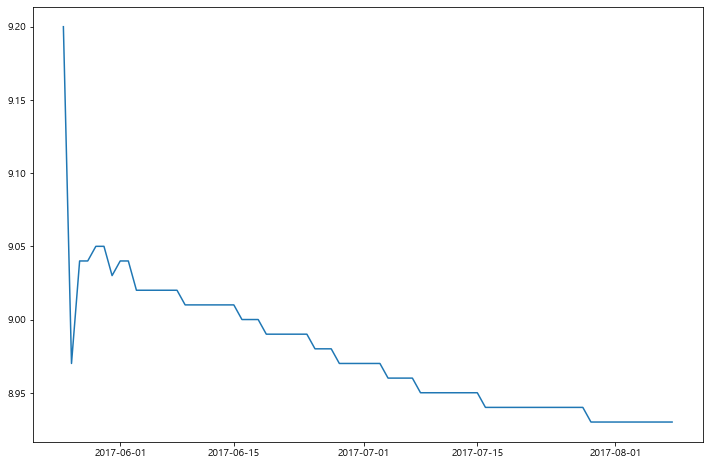

In [106]:
plt.figure(figsize=(12,8))
plt.plot(temp['date'], temp['point'])

- 영화별 날짜 변화에 따른 평점 변화 시각화 [실습]

In [107]:
movie_date_pivot = pd.pivot_table(movie_df, index= ['date'], columns=['name'], values=['point'])
movie_date_pivot.head()

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

In [111]:
movie_date_pivot.columns = movie_date_pivot.columns.droplevel()

In [112]:
movie_date_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


한글 안깨지게 만들기

In [100]:
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


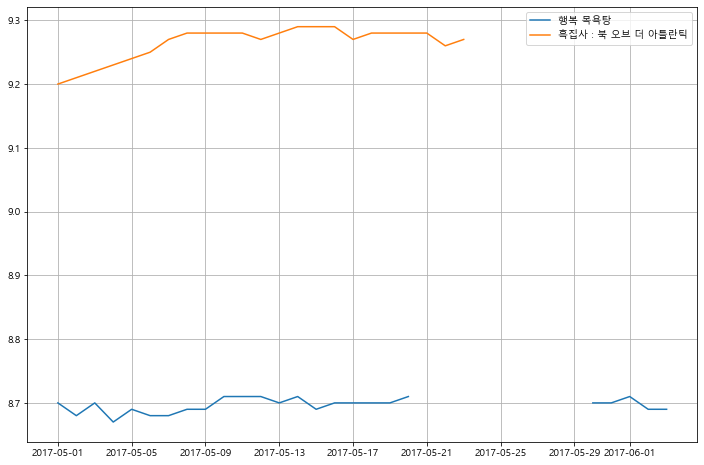

In [113]:
target_col = ['행복 목욕탕', '흑집사 : 북 오브 더 아틀란틱']
plt.figure(figsize=(12,8))
plt.plot(movie_date_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

In [34]:
base_url = 'https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20170802'

try:
    html = urlopen(base_url+sub_url)
except HTTPError as he : 
    print('http error')
except URLError as ue : 
    print('url error')
else :
    print('정상 작동 중~')

정상 작동 중~


In [35]:
soup = BeautifulSoup(html.read(), 'html.parser')

In [40]:
soup.find_all('div', 'tit5')[0:3]

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>]